Héctor E. Delgado Díaz  
ASTR 511  
Prof. Željko Ivezić  
Homework #1

## Problem 1  

For stars with 0.2 < g −r < 0.4, plot ln( ρ ) vs. Z, where ρ is the stellar number density in a given bin (e.g. look at Figs. 5 and 15 in Jurić et al. 2008, ApJ, 673, 864 for similar examples). You can approximate ρ (Z) = N(Z)/V (Z), where N(Z) is the number of stars in a given bin, and V (Z) is the bin volume (note that the solid angle is ∆Ω ∼ 314 deg 2 ). What is the Z range where you believe the results for ρ (Z), and why?

In [62]:
# Import standard libraries

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import copy
import pandas as pd

from scipy.optimize import curve_fit

In [63]:
# Read data

from astropy.table import Table
data1 = Table.read('Astr511HW1data.dat', format='ascii')

In [64]:
data1

ra,dec,run,Ar,u,g,r,i,z,uErr,gErr,rErr,iErr,zErr,pmL,pmB,pmErr
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
181.6122,27.5726,5087,0.05,16.4,15.24,14.8,14.73,14.69,0.02,0.02,0.02,0.02,0.01,5.16,-1.45,2.72
181.61303,27.6077,5087,0.05,21.84,19.55,18.4,18.04,17.79,0.18,0.02,0.02,0.02,0.02,5.48,4.73,3.16
181.61416,27.35956,5112,0.05,19.76,17.56,16.61,16.23,16.07,0.03,0.01,0.02,0.03,0.03,3.14,7.92,2.79
181.6164,27.82464,5112,0.06,21.73,20.63,20.19,19.99,20.04,0.16,0.03,0.03,0.03,0.13,19.13,-1.08,5.08
181.62112,28.01623,5087,0.05,21.37,20.38,20.11,20.05,19.87,0.11,0.04,0.03,0.03,0.09,-3.65,-8.0,4.91
181.62252,27.63987,5087,0.05,17.34,15.58,14.82,14.64,14.51,0.02,0.02,0.02,0.02,0.01,9.74,-10.64,2.72
181.62469,27.32682,5112,0.05,21.63,20.52,20.21,20.1,19.91,0.13,0.02,0.03,0.04,1.07,6.73,-25.39,5.13
181.62582,27.42162,5112,0.05,23.16,21.09,19.67,19.04,18.66,0.46,0.03,0.02,0.03,0.04,35.17,7.8,4.18
181.63178,26.93836,5112,0.05,18.57,15.96,14.77,14.25,13.96,0.02,0.02,0.02,0.02,0.02,15.96,-8.01,2.72


In [65]:
# Assign important values from the table

# SDSS photometry(corrected for the ISM extinction)
u = np.array(data1['u'])
g = np.array(data1['g'])
r = np.array(data1['r'])
i = np.array(data1['i'])
z = np.array(data1['z'])
x = u - g
y = g - r
g_i = g - i

In [66]:
# Best-fit coefficients to calculate metallicity 

A = -13.13
B = 14.09
C = 28.04
D = -5.51
E = -5.90
F = -58.68
G = 9.14
H = -20.61
I = 0.0
J = 58.20

To calculate metallicity, use Bond et al. 2010 expression:  

$$[\textrm{Fe}/\textrm{H}] = \textrm{A} + \textrm{B}x + \textrm{C}y + \textrm{D}xy + \textrm{E}x^2 + \textrm{F}y^2 + \textrm{G}x^2y + \textrm{H}xy^2 + \textrm{I}x^3 + \textrm{J}y^3$$   

Where x = (u - g) and y = (g - r) and the best-fit coefficients (A-J) = (−13.13, 14.09, 28.04, −5.51, −5.90, −58.68, 9.14, −20.61, 0.0, 58.20).  For stars where $g-r<0.6$ $[\textrm{Fe}/\textrm{H}]=-0.6$.

In [67]:
# Calculate metallicity for each star

metal = []
for a, b in enumerate(y):
    if b < 0.6:
        Fe_H = A + B * x[a] + C * b + D * x[a] * b + E * x[a] ** 2 + F * b ** 2 + G * x[a] ** 2 * b \
        + H * x[a] * b **2 + I * x[a] ** 3 + J * b ** 3
        
        metal.append(Fe_H)
    else:
        Fe_H = -0.6
        
        metal.append(Fe_H)

To calculate the distance of each star:  
$$D = 10^{\frac{r-M_r}{5}+1}[pc]$$

Where $M_r$ is:

$${M_r}(g-i,[\textrm{Fe}/\textrm{H}]) = M_r^0(g-i) + \Delta{M_r}([\textrm{Fe}/\textrm{H}])$$  

$\Delta M_r$ is:

$$\Delta{M_r}([\textrm{Fe}/\textrm{H}]) = 4.50 - 1.11[\textrm{Fe}/\textrm{H}] - 0.18[\textrm{Fe}/\textrm{H}]^2$$ 

and $M_r^0$ is:

$$M_r^0(\textrm{g-i}) = -5.06 + 14.32x - 12.97x^2 + 6.127x^3 - 1.267x^4 + 0.0967x^5$$

In [68]:
# Calculate the magnitude from the equations

mag = []

for a in range(len(g_i)):
    M = -5.06 + 14.32 * g_i[a] - 12.97 * g_i[a] ** 2 + 6.127 * g_i[a] ** 3 - 1.267 * g_i[a] ** 4 \
    + 0.0967 * g_i[a] ** 5 + 4.50 - 1.11 * metal[a] - 0.18 * metal[a] ** 2
    
    mag.append(M)

In [69]:
mag = np.array(mag)

In [70]:
# Calculate the distance for each star

D = (10 ** ((r - mag) / 5 + 1)) / 1000 # converting from pc to kpc

Z = D

In [71]:
# Filter only stars with 0.2 < g-r < 0.4 

ind = np.where([0.2 < n < 0.4 for n in y])[0]
stars = D[ind]
Mr = mag[ind]
print("There are",len(stars),"in the g-r band")

There are 107673 in the g-r band


In [72]:
# Convert dOmega from degrees squared to steradians

dOmega = 314/3282.8 # convert from deg^2 to sr

dOmega

0.09565005483124162

In [73]:
# The volume is binned in 1kpc so D = to 1kpc
# dV = dOmega * D^2 * dD where dD is arbitrarily 1kpc

bins = np.arange(1, 25)

dV = dOmega * bins ** 2

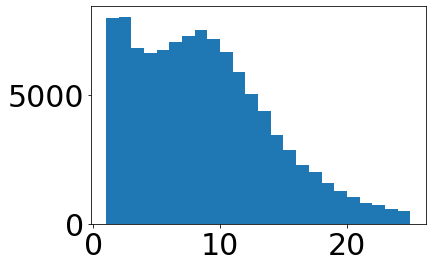

In [74]:
# Plot the histogram to get the number of stars per bin

n_stars, n_bins, p = plt.hist(stars, bins = np.arange(1,26))

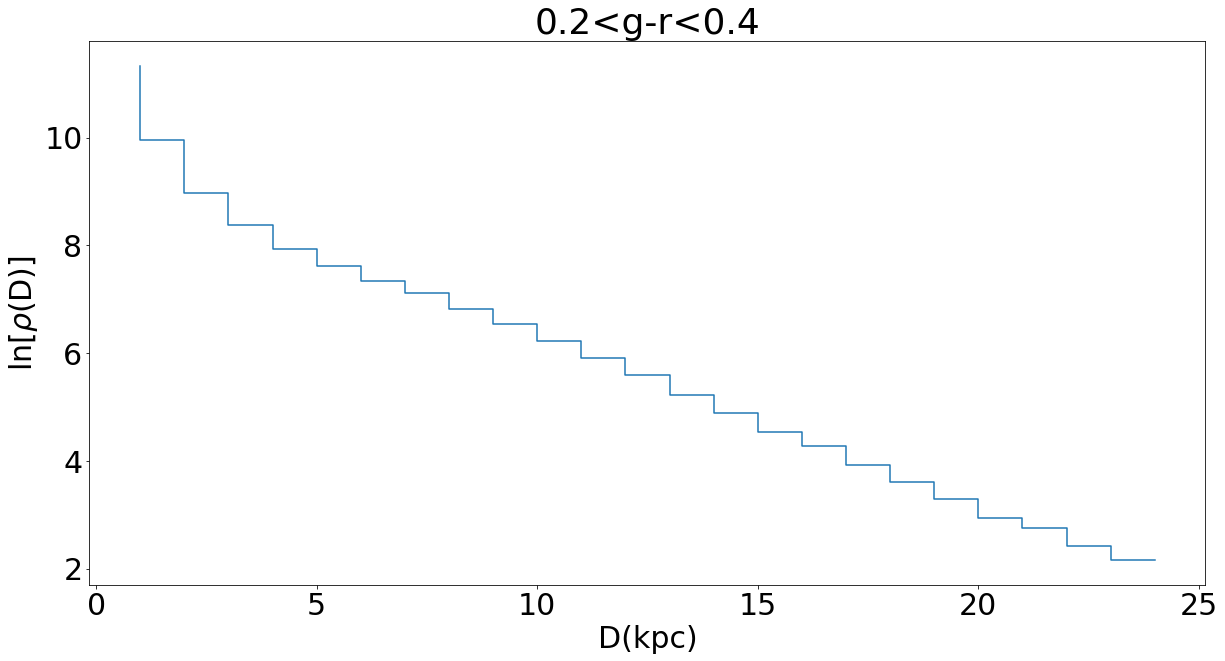

In [75]:
# Plot the density of stars as a function of distance

plt.figure(figsize=(20,10))
plt.step(bins, (np.log(n_stars / dV)))
plt.title('0.2<g-r<0.4')
plt.xlabel('D(kpc)')
plt.ylabel('ln[$\\rho$(D)]')
plt.rcParams.update({'font.size': 30})
plt.show()

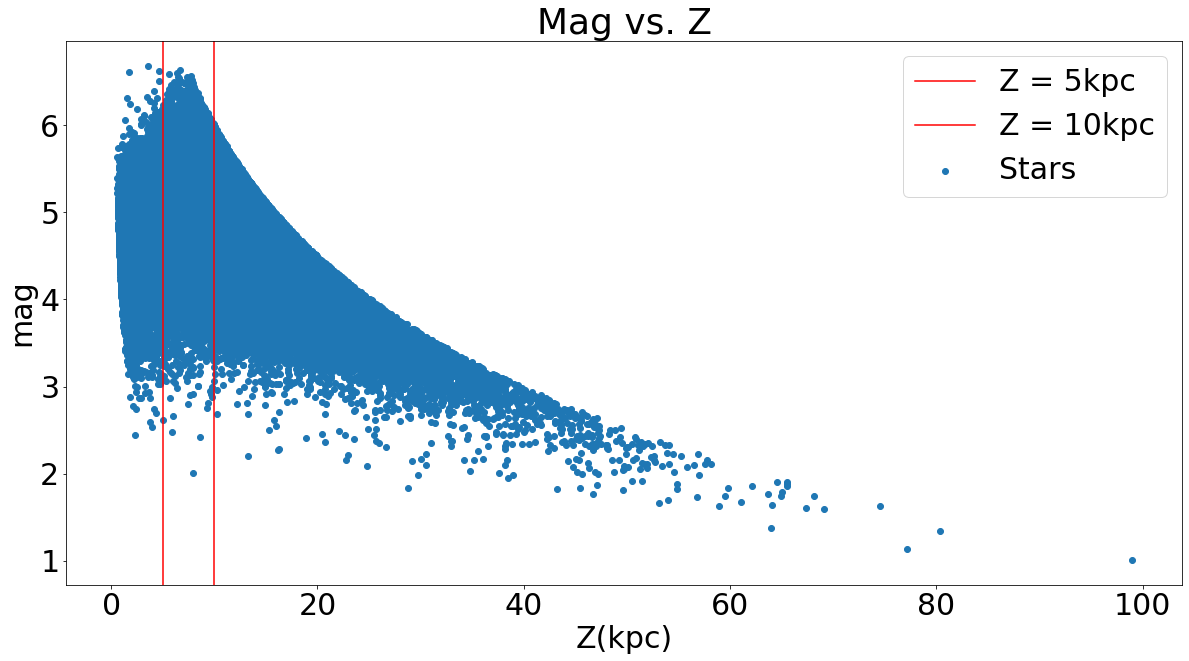

In [76]:
# Plot stars with color 0.2 < g - r < 0.4 as a function of Z

plt.figure(figsize=(20,10))
plt.scatter(stars, Mr, label = "Stars")
plt.axvline(5, label = "Z = 5kpc", color = "r")
plt.axvline(10, label = "Z = 10kpc", color = "r")
plt.title('Mag vs. Z')
plt.xlabel('Z(kpc)')
plt.ylabel('mag')
#plt.yscale(u'log')
plt.legend()
plt.rcParams.update({'font.size': 30})
plt.show()

### Answer  

It can be seen from this plot that, after ~8kpc, the number of stars observed falls exponentially which is not a behavior expected, hence this is where the luminosity bias affects the data. Therefore, the range for Z that seems to be good data is for Z < 8 kpc.

## Problem 2  

Add ln( ρ ) vs. Z for stars with 0.4 < g − r < 0.6, 0.6 < g − r < 0.8, and 0.8 < g − r < 1.0 (you can rescale all curves to the same value at some ﬁducial Z, or leave them as they are). Discuss the diﬀerences compared to the 0.2 < g−r < 0.4 subsample. Why do we expect larger systematic errors for 0.8 < g − r < 1.0 than for the adjacent bin with 0.4 < g − r < 0.6?

In [77]:
# Get the number of stars for each range of g-r band
# Stars in 0.4 < x < 0.6 mag
ind = np.where([0.4 < n < 0.6 for n in y])[0]
stars1 = D[ind]

print("There are",len(stars1), "in 0.4 < g-r < 0.6 band")

# Stars in 0.6 < x < 0.8 mag
ind = np.where([0.6 < n < 0.8 for n in y])[0]
stars2 = D[ind]

print("There are",len(stars2), "in 0.6 < g-r < 0.8 band")

# Stars in 0.8 < x < 1.0 mag
ind = np.where([0.8 < n < 1.0 for n in y])[0]
stars3 = D[ind]

print("There are",len(stars3),"in 0.8 < g-r < 1.0 band")

There are 92299 in 0.4 < g-r < 0.6 band
There are 49386 in 0.6 < g-r < 0.8 band
There are 36206 in 0.8 < g-r < 1.0 band


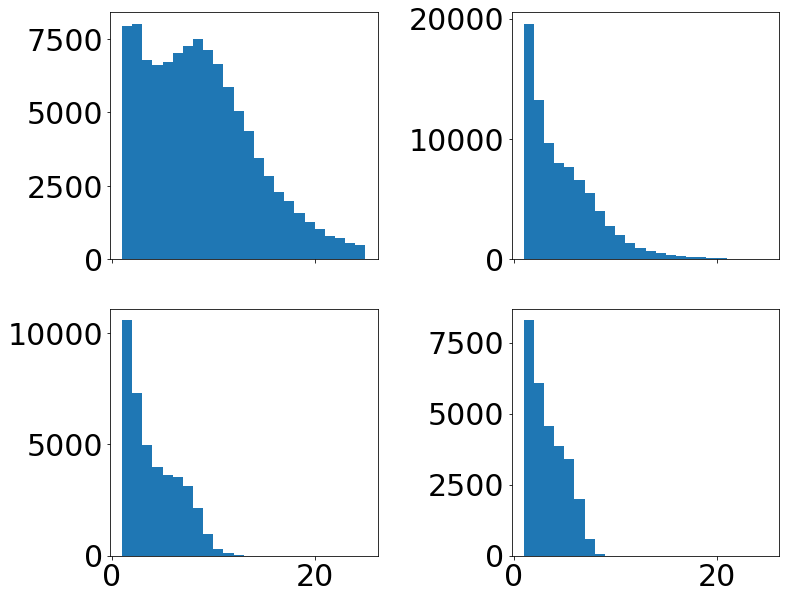

In [78]:
# Get the number of stars per bin for each mag

fig, ax = plt.subplots(2,2, figsize = (12,10), sharex=True, gridspec_kw={"wspace" : 0.5})
n_stars, n_bins, p = ax[0,0].hist(stars, bins = np.arange(1,26))
n_stars1, n_bins, p = ax[0,1].hist(stars1, bins = np.arange(1,26))
n_stars2, n_bins, p = ax[1,0].hist(stars2, bins = np.arange(1,26))
n_stars3, n_bins, p = ax[1,1].hist(stars3, bins = np.arange(1,26))

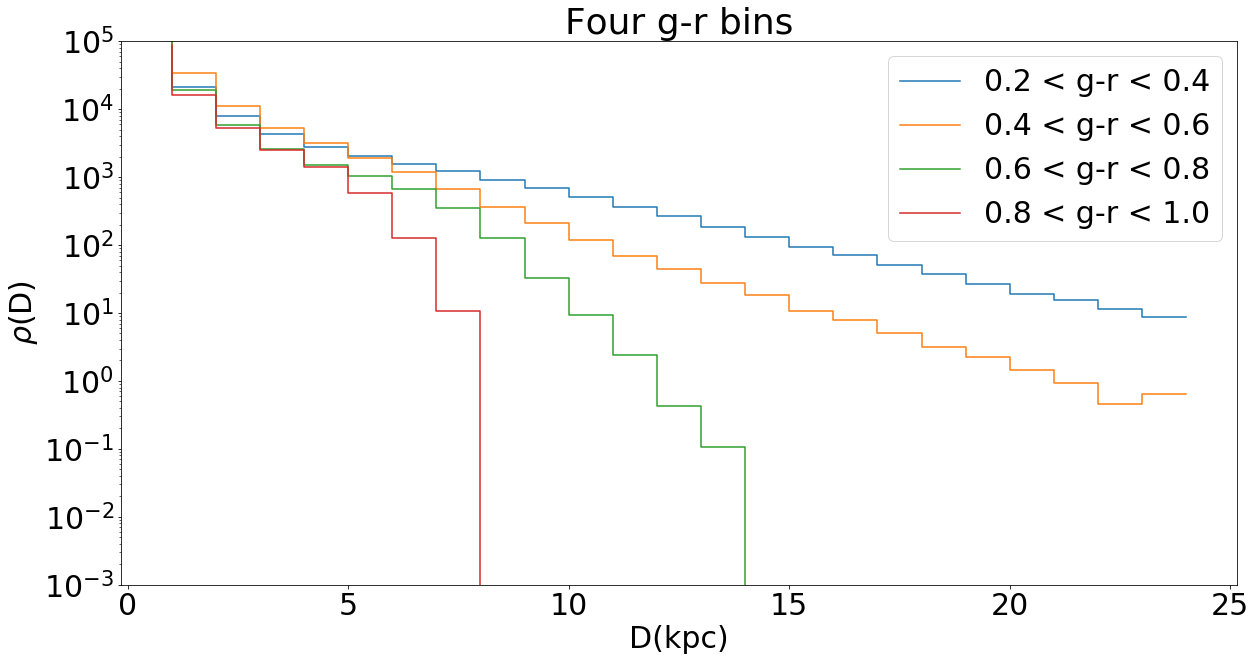

In [79]:
# Plot the density of stars for each bin for the four different g-r bands

plt.figure(figsize=(20,10))
plt.step(bins, (n_stars / dV), label = "0.2 < g-r < 0.4")
plt.step(bins, (n_stars1 / dV), label = "0.4 < g-r < 0.6")
plt.step(bins, (n_stars2 / dV), label = "0.6 < g-r < 0.8")
plt.step(bins, (n_stars3 / dV), label = "0.8 < g-r < 1.0")
plt.title('Four g-r bins')
plt.xlabel('D(kpc)')
plt.ylabel('$\\rho$(D)')
plt.yscale(u'log')
plt.ylim([1e-3, 1e5])
plt.rcParams.update({'font.size': 30})
plt.legend()
plt.show()

### Answer  

A higher g - r number means that the star is redder, thus having a higher magnitude and being less luminous. Because of SDSS's sensitivity, higher colored stars are harder to see and the luminous bias affects the amount of stars for higher g - r will be affected, as shown in the plot above. This means that higher g - r subsamples will have a higher bias towards not being detected.

## Problem 3  

For subsample with 0.2 < g−r < 0.4, separate stars into low-metallicity sample, [Fe/H] < −1.0, and high-metallicity sample, [Fe/H] > −1.0. Compare their ln( ρ ) vs. Z curves. What do you conclude?

In [80]:
# Get stars with 0.2 < g-r < 0.4 and separate between [Fe/H] < -1.0 and [Fe/H] > 1.0

ind = np.where([0.2 < n < 0.4 for n in y])[0]
ind1 = np.where([n < -1.0 for n in metal])[0]
ind2 = np.intersect1d(ind, ind1)
stars4 = D[ind2]

ind = np.where([0.2 < n < 0.4 for n in y])[0]
ind1 = np.where([n > -1.0 for n in metal])[0]
ind3 = np.intersect1d(ind, ind1)
stars5 = D[ind3]

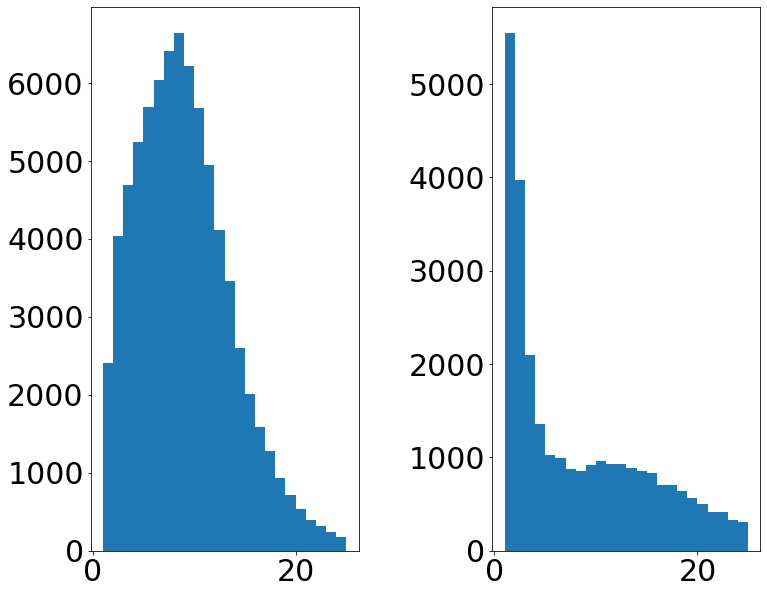

In [81]:
# Get the number of stars per bin for each metallicity

fig, ax = plt.subplots(1,2, figsize = (12,10), gridspec_kw={"wspace" : 0.5})
n_stars4, n_bins, p = ax[0].hist(stars4, bins = np.arange(1,26))
n_stars5, n_bins, p = ax[1].hist(stars5, bins = np.arange(1,26))

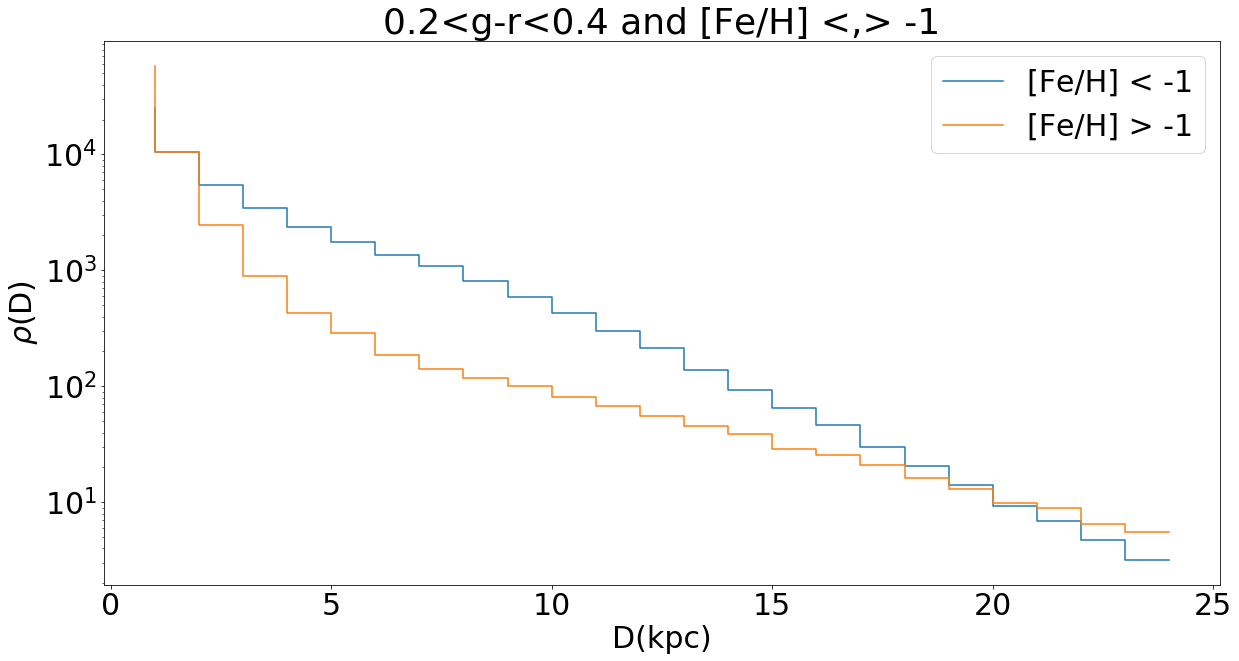

In [82]:
# Plot the density of stars for each bin for the two different metallicities

plt.figure(figsize=(20,10))
plt.step(bins, (n_stars4 / dV), label = "[Fe/H] < -1")
plt.step(bins, (n_stars5 / dV), label = "[Fe/H] > -1")
plt.title('0.2<g-r<0.4 and [Fe/H] <,> -1')
plt.xlabel('D(kpc)')
plt.ylabel('$\\rho$(D)')
plt.yscale(u'log')
plt.legend()
plt.rcParams.update({'font.size': 30})
plt.show()

### Answer  

From the graph above it can be concluded:

1. Our vincinity has an isotropic amount of stars for low and high metallicity.
2. Low metallicity stars are more common between the disk and the halo. They should be older stars because they have not experienced clouds with high metallicity component.
3. At the far halo, higher metallicity stars are more predominant. This could mean the photometric error affects the observed metallicity at further distances. Maybe these stars are not high metallicity rather they are low metallicity and it is just contaminated data.

However, our data has a lunminosity bias after 8kpc so maybe this could be wrong.

## Problem 4  

For these low-metallicity and high-metallicity samples, plot and compare their diﬀerential r band magnitude distributions (i.e. the number of sources per unit magnitude, in small, say 0.1 mag wide, r bins). What do you conclude? How would you numerically describe these curves (i.e. what kind of functional form for the ﬁtting functions would you choose)?

In [83]:
# Get r for each different metalicity in the subsample 0.2 < g - r < 0.4

r_low = r[ind2]

r_high = r[ind3]

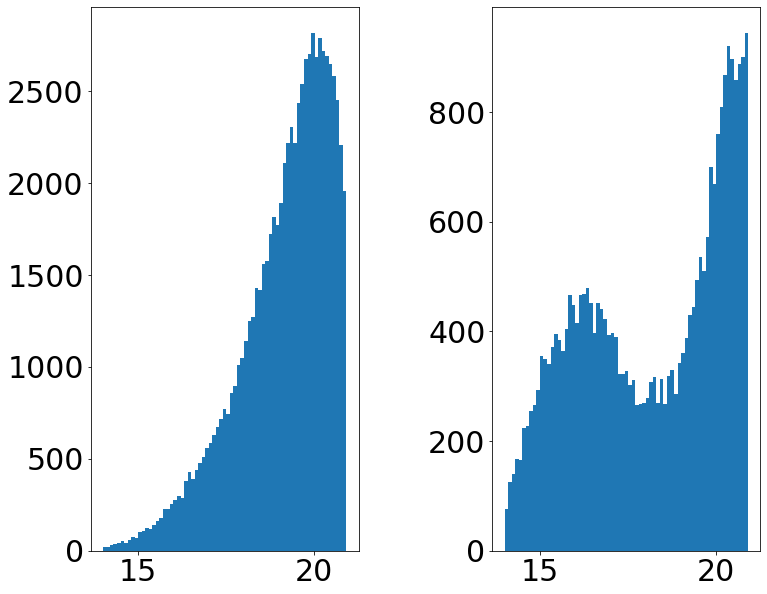

In [84]:
# Assign a dr of 0.1 for each bin

dr = 0.1

bins1 = np.arange(min(r_low), max(r_low) - 0.1, step = dr)
bins2 = np.arange(min(r_high), max(r_high) - 0.1, step = dr)

# Get number of stars wirth r bands for each bin for low r and high r
fig, ax = plt.subplots(1,2, figsize = (12,10), gridspec_kw={"wspace" : 0.5})
n_r_low, n_bins, p = ax[0].hist(r_low, bins = np.arange(min(r_low), max(r_low), step = dr))
n_r_high, n_bins, p = ax[1].hist(r_high, bins = np.arange(min(r_high), max(r_high), step = dr))

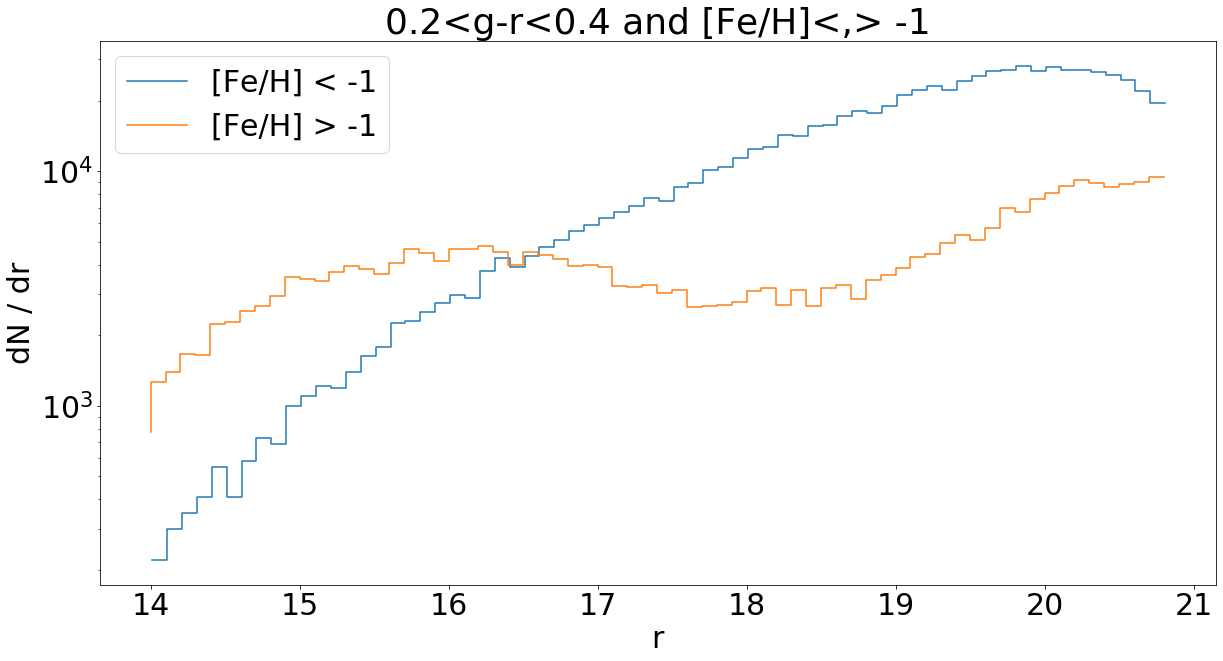

In [85]:
plt.figure(figsize=(20,10))
plt.step(bins1, (n_r_low / dr), label = "[Fe/H] < -1")
plt.step(bins2, (n_r_high / dr), label = "[Fe/H] > -1")
plt.title('0.2<g-r<0.4 and [Fe/H]<,> -1')
plt.xlabel('r')
plt.ylabel('dN / dr')
plt.yscale(u'log')
plt.legend()
plt.rcParams.update({'font.size': 30})
plt.show()

### Answer

In conclusion, the number of stars per redness for low metallicity grows linearly when becoming redder. There are more stars less luminous than stars with less redness. However, the flux-limit affects fainter low metallicity stars and makes the right side of the line go down instead of keepin its linearity as it should.  

As for the high metallicity stars, The first local maxium shows the scale height of the disk since that r-range is probing the disk and not the halo. 

## Problem 5  

What should be the faint r band limit for a survey to be able to map the ln( ρ ) vs. Z proﬁle out to 100 kpc using main-sequence stars? Assume the same color distribution as for the SDSS sample. For a solid angle of 1 deg 2 , how many stars with 0.2 < g − r < 0.4 would you expect with distances between 90 kpc and 100 kpc? Assume whatever additional information you need to solve this problem (not all required information is provided here).

### Answer:  



Based on the information from Problem 1, an upper limit to the Z profile that contains the most accurate data is with Z < 8kpc. As for a lower limit, Izević et al. 2008, shows on Table 3 that at Z < 4kpc, the fraction of halo-to-disk stars falls greatly, hence Z = 4 should be a lower limit to the data. Outside of that range, the data becomes flux limited.  

Now that Z is constrained, using the Pythagorean theorem, calculate the distance from the galactic center (gc) using a distance of 0.8kpc the Solar system is from the center.

Also, using a density falloff $\rho \propto \frac{1}{R^3}$, the number of stars from 90-100kpc can be calculated.

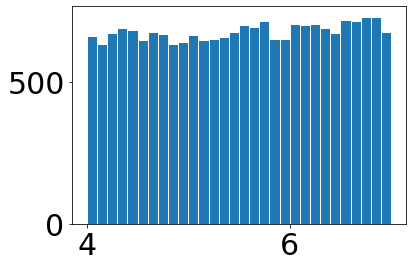

In [101]:
# Calculate the distance from galactic center for the stars within 4 < Z < 8

#ind = np.where([4 < n < 7 for n in Z])[0]
ind = np.where([0.2 < n < 0.4 for n in y])[0]
ind1 = np.where([4 < n < 7 for n in Z])[0]
ind2 = np.intersect1d(ind, ind1)
Z_cut = Z[ind2]

bins3 = np.arange(4,7,0.1)
r_bins = np.sqrt(8 ** 2 + bins3 ** 2)

dV1 = dOmega * bins3 ** 2

n_z, n_bins, p = plt.hist(Z_cut, bins = np.arange(4,7.1,0.1), edgecolor="white")

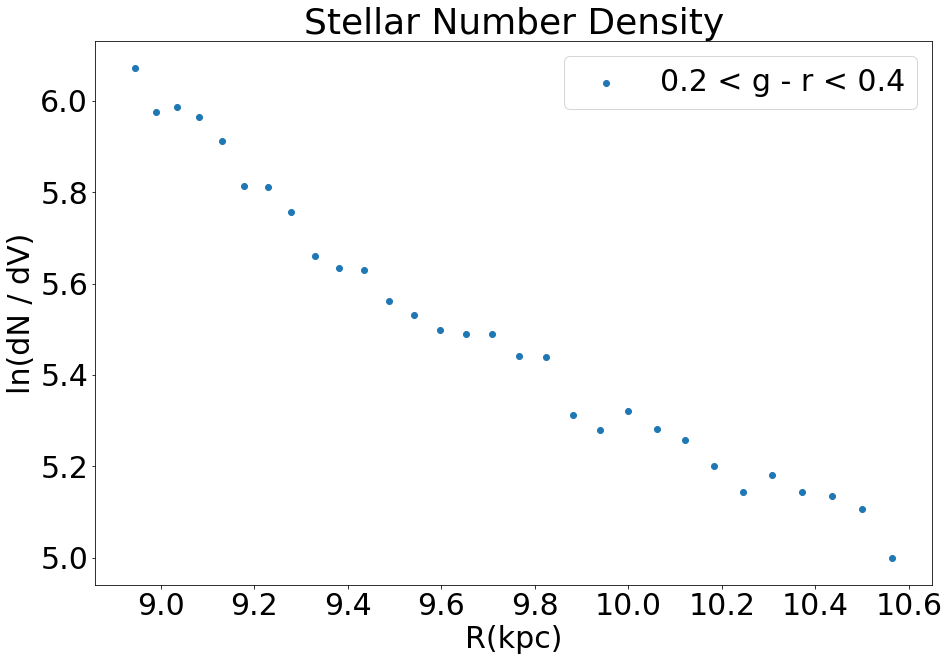

In [102]:
plt.figure(figsize=(15,10))
plt.scatter(r_bins, np.log(n_z / dV1), label = "0.2 < g - r < 0.4")
plt.title('Stellar Number Density')
plt.xlabel('R(kpc)')
plt.ylabel('ln(dN / dV)')
#plt.yscale(u'log')
plt.legend()
plt.rcParams.update({'font.size': 30})
plt.show()

In [103]:
def power(x, a):
    return a * x ** -3

val, cov = curve_fit(power, r_bins, (n_z / dV1))
print(val)

[236298.75561358]


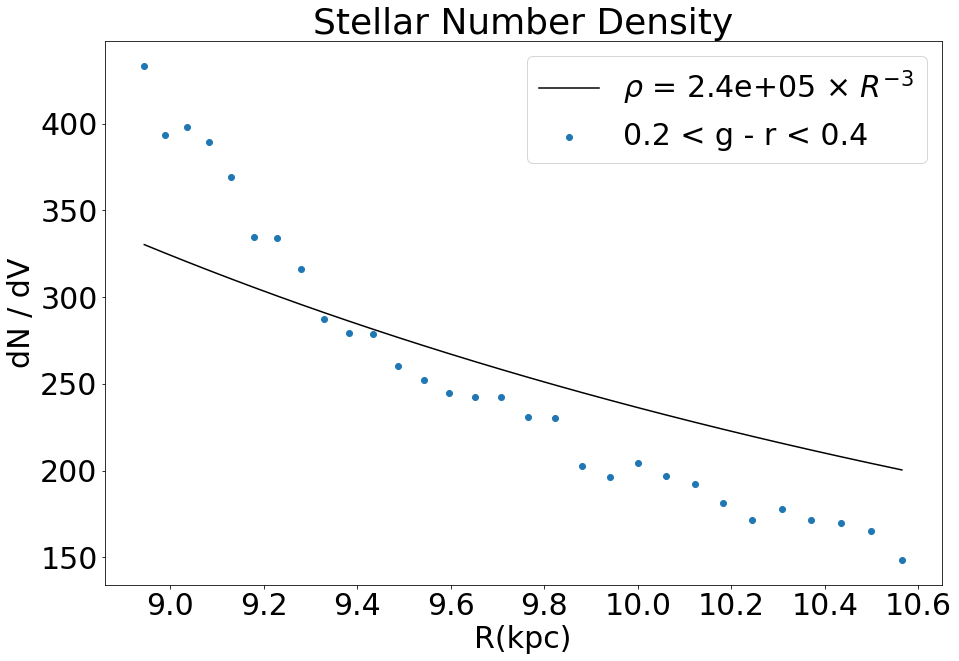

In [118]:
plt.figure(figsize=(15,10))
plt.scatter(r_bins, (n_z / dV1), label = "0.2 < g - r < 0.4")
#plt.plot(r_bins, power(r_bins, val[0], val[1]), label = "$\\rho$ = {:.2} $\\times$ $R^{{{:.2}}}$".format(val[0],-val[1]), color = "black")
plt.plot(r_bins, power(r_bins, val), label = "$\\rho$ = {:.2} $\\times$ $R^{{-3}}$".format(val[0]), color = "black")
plt.title('Stellar Number Density')
plt.xlabel('R(kpc)')
plt.ylabel('dN / dV')
plt.legend()
plt.rcParams.update({'font.size': 30})
plt.show()

In [110]:
# For stars between 90 to 100kpc

R = np.linspace(90, 100, 100)

#drho = power(R, val[0], val[1]) # density of stars
drho = power(R, val) # density of stars

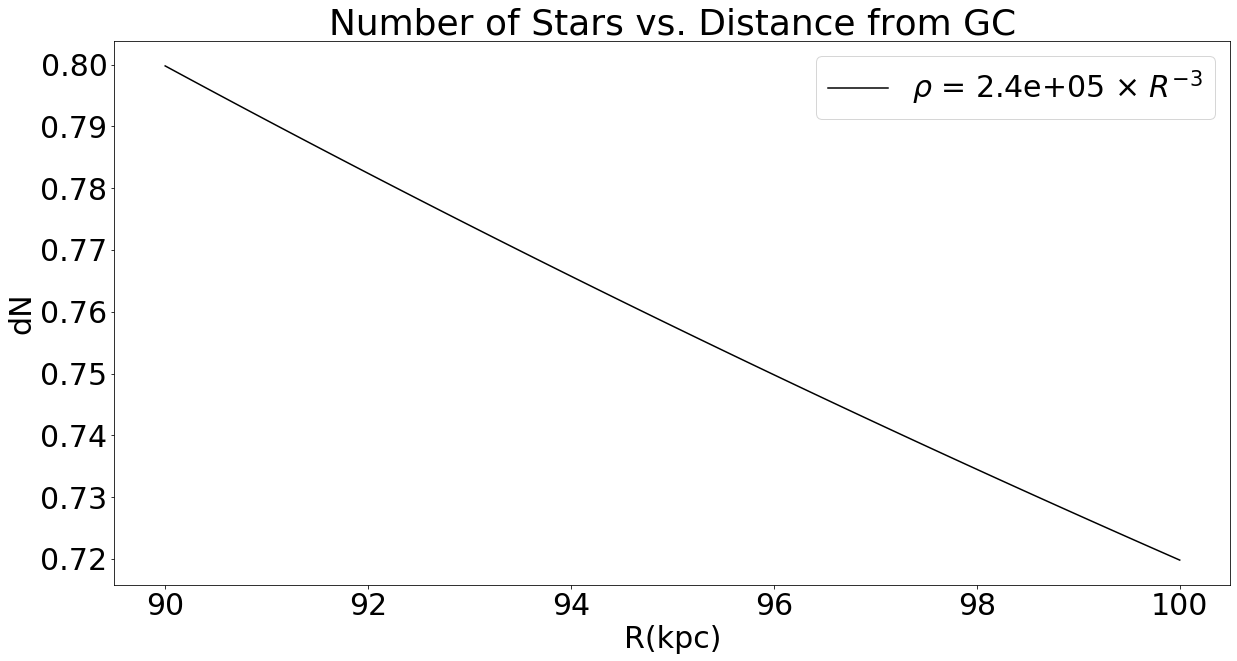

In [119]:
# Using 1 deg^2 convert from deg^2 to sr
dOmega1 = 1/3282.8 

# Convert from rho to N by using rho * dV

dV2 = dOmega1 * R ** 2

N = dV2 * drho

plt.figure(figsize=(20,10))
#plt.plot(R, N, label = "$\\rho$ = {:.2} $\\times$ $R^{{{:.2}}}$".format(val[0],-val[1]), color = "black")
plt.plot(R, N, label = "$\\rho$ = {:.2} $\\times$ $R^{{-3}}$".format(val[0]), color = "black")
plt.title('Number of Stars vs. Distance from GC')
plt.xlabel('R(kpc)')
plt.ylabel('dN')
plt.legend()
plt.rcParams.update({'font.size': 30})
plt.show()

In [112]:
print("The number of stars from 90-100kpc is", format(np.sum(N), ".6f" ))

The number of stars from 90-100kpc is 75.840820
